In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [2]:
import statsmodels.api as sm
import itertools
from matplotlib.pylab import rcParams
plt.style.use('ggplot')
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error

# Import  time series

In [3]:
import pickle
with open('./data/melted_zip2.pickle', 'rb') as file:
    melted_zip2 = pickle.load(file)
    

# ARIMA Modeling

In [4]:
melted_zip2.head()

,value
time,
1996-04-01,39500.0
1996-05-01,39500.0
1996-06-01,39400.0
1996-07-01,39300.0
1996-08-01,39200.0


In [5]:
ts1 = melted_zip2['2010-01-01':]
ts1

,value
time,
2010-01-01,76400.0
2010-02-01,76600.0
2010-03-01,76300.0
2010-04-01,75800.0
2010-05-01,75800.0
...,...
2017-12-01,100800.0
2018-01-01,100600.0
2018-02-01,101900.0


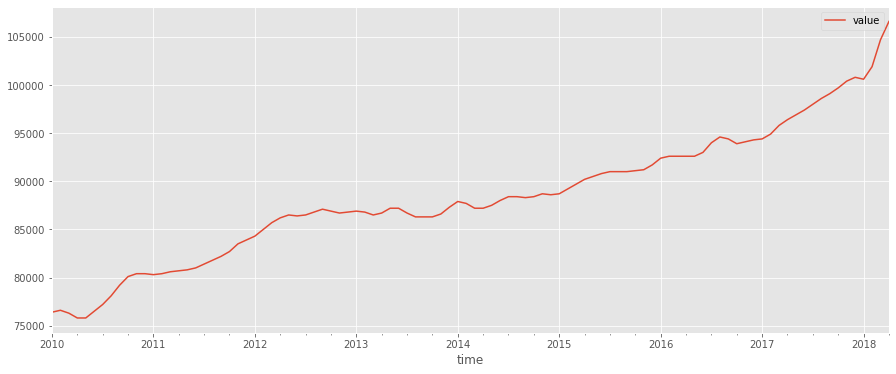

              value
time               
2010-01-01  76400.0
2010-02-01  76600.0
2010-03-01  76300.0
2010-04-01  75800.0
2010-05-01  75800.0


In [7]:
#ts1 = melted_zip2['value'].resample('MS').mean()
ts1 = ts1.fillna(ts1.bfill())
ts1.plot(figsize=(15,6))
plt.show()

print(ts1.head())

In [82]:
# from statsmodels.tsa.stattools import adfuller

# dftest = adfuller(ts1['value'])

# # Extract and display test results in a user friendly manner
# dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
# for key,value in dftest[4].items():
#     dfoutput['Critical Value (%s)'%key] = value

# print(dftest)

# print ('Results of Dickey-Fuller test: \n')

# print(dfoutput)

In [58]:
# # Difference the time series
# ts1_diff = ts1.diff().dropna()
# ts1_diff

In [59]:
# ts1_diff.plot(figsize=(15,6))
# plt.show()


In [9]:
warnings.filterwarnings('ignore')
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)  

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 1) for x in list(itertools.product(p, d, q))]

In [10]:
warnings.filterwarnings('ignore')
# Run a grid with pdq and seasonal pdq parameters calculated above and get the best AIC value
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(ts1,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
        except:
            continue  

ARIMA (0, 0, 0) x (0, 0, 0, 1)12 : AIC Calculated =2538.86096827664
ARIMA (0, 0, 0) x (0, 0, 1, 1)12 : AIC Calculated =2445.1241142505482
ARIMA (0, 0, 0) x (0, 0, 2, 1)12 : AIC Calculated =2374.344631710899
ARIMA (0, 0, 0) x (0, 1, 0, 1)12 : AIC Calculated =1521.488503958027
ARIMA (0, 0, 0) x (0, 1, 1, 1)12 : AIC Calculated =1421.9169132496081
ARIMA (0, 0, 0) x (0, 1, 2, 1)12 : AIC Calculated =1376.7799823632263
ARIMA (0, 0, 0) x (0, 2, 0, 1)12 : AIC Calculated =1431.541051255635
ARIMA (0, 0, 0) x (0, 2, 1, 1)12 : AIC Calculated =1406.300607104185
ARIMA (0, 0, 0) x (0, 2, 2, 1)12 : AIC Calculated =1362.233642343166
ARIMA (0, 0, 0) x (1, 0, 0, 1)12 : AIC Calculated =1500.8905297377592
ARIMA (0, 0, 0) x (1, 0, 1, 1)12 : AIC Calculated =1413.1055390387417
ARIMA (0, 0, 0) x (1, 0, 2, 1)12 : AIC Calculated =1380.642642343757
ARIMA (0, 0, 0) x (1, 1, 0, 1)12 : AIC Calculated =1441.3204414550003
ARIMA (0, 0, 0) x (1, 1, 1, 1)12 : AIC Calculated =1400.7110716574953
ARIMA (0, 0, 0) x (1, 1, 2, 

ARIMA (0, 1, 1) x (1, 0, 1, 1)12 : AIC Calculated =1381.5769957009084
ARIMA (0, 1, 1) x (1, 0, 2, 1)12 : AIC Calculated =1361.8066781700759
ARIMA (0, 1, 1) x (1, 1, 0, 1)12 : AIC Calculated =1402.6331437652623
ARIMA (0, 1, 1) x (1, 1, 1, 1)12 : AIC Calculated =1358.7302993994456
ARIMA (0, 1, 1) x (1, 1, 2, 1)12 : AIC Calculated =1344.6150859261502
ARIMA (0, 1, 1) x (1, 2, 0, 1)12 : AIC Calculated =1424.222158754128
ARIMA (0, 1, 1) x (1, 2, 1, 1)12 : AIC Calculated =1377.8903626669671
ARIMA (0, 1, 1) x (1, 2, 2, 1)12 : AIC Calculated =1338.5263714263103
ARIMA (0, 1, 1) x (2, 0, 0, 1)12 : AIC Calculated =1398.173497279918
ARIMA (0, 1, 1) x (2, 0, 1, 1)12 : AIC Calculated =1385.238732549847
ARIMA (0, 1, 1) x (2, 0, 2, 1)12 : AIC Calculated =1362.5752535753415
ARIMA (0, 1, 1) x (2, 1, 0, 1)12 : AIC Calculated =1374.7185201327627
ARIMA (0, 1, 1) x (2, 1, 1, 1)12 : AIC Calculated =1358.7924701776583
ARIMA (0, 1, 1) x (2, 1, 2, 1)12 : AIC Calculated =1338.9332891947565
ARIMA (0, 1, 1) x (2, 2

ARIMA (0, 2, 2) x (2, 0, 2, 1)12 : AIC Calculated =1327.4412817379837
ARIMA (0, 2, 2) x (2, 1, 0, 1)12 : AIC Calculated =1371.1362621929427
ARIMA (0, 2, 2) x (2, 1, 1, 1)12 : AIC Calculated =1337.858825355598
ARIMA (0, 2, 2) x (2, 1, 2, 1)12 : AIC Calculated =1315.6176861540112
ARIMA (0, 2, 2) x (2, 2, 0, 1)12 : AIC Calculated =1419.2726144292237
ARIMA (0, 2, 2) x (2, 2, 1, 1)12 : AIC Calculated =1348.5195311620093
ARIMA (0, 2, 2) x (2, 2, 2, 1)12 : AIC Calculated =1344.8477415876407
ARIMA (1, 0, 0) x (0, 0, 0, 1)12 : AIC Calculated =1500.8905297377592
ARIMA (1, 0, 0) x (0, 0, 1, 1)12 : AIC Calculated =1413.0596737271378
ARIMA (1, 0, 0) x (0, 0, 2, 1)12 : AIC Calculated =1415.1493459191186
ARIMA (1, 0, 0) x (0, 1, 0, 1)12 : AIC Calculated =1441.3204414550003
ARIMA (1, 0, 0) x (0, 1, 1, 1)12 : AIC Calculated =1400.7017312531866
ARIMA (1, 0, 0) x (0, 1, 2, 1)12 : AIC Calculated =1378.525342851604
ARIMA (1, 0, 0) x (0, 2, 0, 1)12 : AIC Calculated =1431.6399390312426
ARIMA (1, 0, 0) x (0, 

ARIMA (1, 1, 1) x (0, 1, 1, 1)12 : AIC Calculated =1358.730299402446
ARIMA (1, 1, 1) x (0, 1, 2, 1)12 : AIC Calculated =1344.615085962102
ARIMA (1, 1, 1) x (0, 2, 0, 1)12 : AIC Calculated =1424.2221587323347
ARIMA (1, 1, 1) x (0, 2, 1, 1)12 : AIC Calculated =1377.8903626978015
ARIMA (1, 1, 1) x (0, 2, 2, 1)12 : AIC Calculated =1338.5263714074486
ARIMA (1, 1, 1) x (1, 0, 0, 1)12 : AIC Calculated =1419.0618718206906
ARIMA (1, 1, 1) x (1, 0, 1, 1)12 : AIC Calculated =1383.255279507215
ARIMA (1, 1, 1) x (1, 0, 2, 1)12 : AIC Calculated =1362.573540218394
ARIMA (1, 1, 1) x (1, 1, 0, 1)12 : AIC Calculated =1404.4519659833209
ARIMA (1, 1, 1) x (1, 1, 1, 1)12 : AIC Calculated =1386.6267096897175
ARIMA (1, 1, 1) x (1, 1, 2, 1)12 : AIC Calculated =1346.4645362541091
ARIMA (1, 1, 1) x (1, 2, 0, 1)12 : AIC Calculated =1423.0746297334354
ARIMA (1, 1, 1) x (1, 2, 1, 1)12 : AIC Calculated =1399.9810215797881
ARIMA (1, 1, 1) x (1, 2, 2, 1)12 : AIC Calculated =1339.0595705591768
ARIMA (1, 1, 1) x (2, 0,

ARIMA (1, 2, 2) x (1, 1, 2, 1)12 : AIC Calculated =1328.0642271662002
ARIMA (1, 2, 2) x (1, 2, 0, 1)12 : AIC Calculated =1446.4972421129253
ARIMA (1, 2, 2) x (1, 2, 1, 1)12 : AIC Calculated =1367.903965707766
ARIMA (1, 2, 2) x (1, 2, 2, 1)12 : AIC Calculated =1328.257311917848
ARIMA (1, 2, 2) x (2, 0, 0, 1)12 : AIC Calculated =1352.6660167252053
ARIMA (1, 2, 2) x (2, 0, 1, 1)12 : AIC Calculated =1340.7502809504535
ARIMA (1, 2, 2) x (2, 0, 2, 1)12 : AIC Calculated =1327.4081000325268
ARIMA (1, 2, 2) x (2, 1, 0, 1)12 : AIC Calculated =1357.631581664919
ARIMA (1, 2, 2) x (2, 1, 1, 1)12 : AIC Calculated =1331.9780816801676
ARIMA (1, 2, 2) x (2, 1, 2, 1)12 : AIC Calculated =1314.9230821444746
ARIMA (1, 2, 2) x (2, 2, 0, 1)12 : AIC Calculated =1418.9679293691522
ARIMA (1, 2, 2) x (2, 2, 1, 1)12 : AIC Calculated =1372.0488503674383
ARIMA (1, 2, 2) x (2, 2, 2, 1)12 : AIC Calculated =1358.215231587446
ARIMA (2, 0, 0) x (0, 0, 0, 1)12 : AIC Calculated =1436.9160497678513
ARIMA (2, 0, 0) x (0, 0,

ARIMA (2, 1, 0) x (2, 2, 0, 1)12 : AIC Calculated =1368.2525447299165
ARIMA (2, 1, 0) x (2, 2, 1, 1)12 : AIC Calculated =1344.5875720012455
ARIMA (2, 1, 0) x (2, 2, 2, 1)12 : AIC Calculated =1365.6086051032273
ARIMA (2, 1, 1) x (0, 0, 0, 1)12 : AIC Calculated =1398.1734972919899
ARIMA (2, 1, 1) x (0, 0, 1, 1)12 : AIC Calculated =1383.1228023565654
ARIMA (2, 1, 1) x (0, 0, 2, 1)12 : AIC Calculated =1368.4860941068277
ARIMA (2, 1, 1) x (0, 1, 0, 1)12 : AIC Calculated =1374.7203100517465
ARIMA (2, 1, 1) x (0, 1, 1, 1)12 : AIC Calculated =1358.7924699458179
ARIMA (2, 1, 1) x (0, 1, 2, 1)12 : AIC Calculated =1338.9332994556848
ARIMA (2, 1, 1) x (0, 2, 0, 1)12 : AIC Calculated =1400.3459199709473
ARIMA (2, 1, 1) x (0, 2, 1, 1)12 : AIC Calculated =1381.9370632002242
ARIMA (2, 1, 1) x (0, 2, 2, 1)12 : AIC Calculated =1337.8588254130639
ARIMA (2, 1, 1) x (1, 0, 0, 1)12 : AIC Calculated =1385.0435902611791
ARIMA (2, 1, 1) x (1, 0, 1, 1)12 : AIC Calculated =1385.9843469688644
ARIMA (2, 1, 1) x (1

ARIMA (2, 2, 2) x (0, 2, 1, 1)12 : AIC Calculated =1358.2689556582916
ARIMA (2, 2, 2) x (0, 2, 2, 1)12 : AIC Calculated =1326.952775021999
ARIMA (2, 2, 2) x (1, 0, 0, 1)12 : AIC Calculated =1352.8531686581794
ARIMA (2, 2, 2) x (1, 0, 1, 1)12 : AIC Calculated =1340.8393659204733
ARIMA (2, 2, 2) x (1, 0, 2, 1)12 : AIC Calculated =1330.2959535367374
ARIMA (2, 2, 2) x (1, 1, 0, 1)12 : AIC Calculated =1357.6315811773306
ARIMA (2, 2, 2) x (1, 1, 1, 1)12 : AIC Calculated =1331.978081582629
ARIMA (2, 2, 2) x (1, 1, 2, 1)12 : AIC Calculated =1315.0939363042542
ARIMA (2, 2, 2) x (1, 2, 0, 1)12 : AIC Calculated =1418.9679240970304
ARIMA (2, 2, 2) x (1, 2, 1, 1)12 : AIC Calculated =1337.0036309676716
ARIMA (2, 2, 2) x (1, 2, 2, 1)12 : AIC Calculated =1340.7078373327013
ARIMA (2, 2, 2) x (2, 0, 0, 1)12 : AIC Calculated =1337.3795177311918
ARIMA (2, 2, 2) x (2, 0, 1, 1)12 : AIC Calculated =1338.867110883902
ARIMA (2, 2, 2) x (2, 0, 2, 1)12 : AIC Calculated =1328.9130143025961
ARIMA (2, 2, 2) x (2, 1

In [11]:
# Find the parameters with minimal AIC value
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

pdq        (1, 1, 2)
pdqs    (2, 2, 2, 1)
aic          1314.92
Name: 404, dtype: object

In [12]:
# Plug the optimal parameter values into a new SARIMAX model
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(ts1, 
                                        order=(1, 1, 2), 
                                        seasonal_order=(2, 2, 2, 1), 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

# Fit the model and print results
output = ARIMA_MODEL.fit()

print(output.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2004      0.304     -0.660      0.509      -0.795       0.395
ma.L1         -1.9651      0.172    -11.422      0.000      -2.302      -1.628
ma.L2          0.9720      0.171      5.697      0.000       0.638       1.306
ar.S.L1        0.1726      0.386      0.447      0.655      -0.583       0.929
ar.S.L2       -0.1860      0.242     -0.770      0.442      -0.660       0.288
ma.S.L1        1.2110      0.326      3.714      0.000       0.572       1.850
ma.S.L2        0.5343      0.244      2.191      0.028       0.056       1.012
sigma2      8.869e+04   1.42e+04      6.247      0.000    6.09e+04    1.17e+05


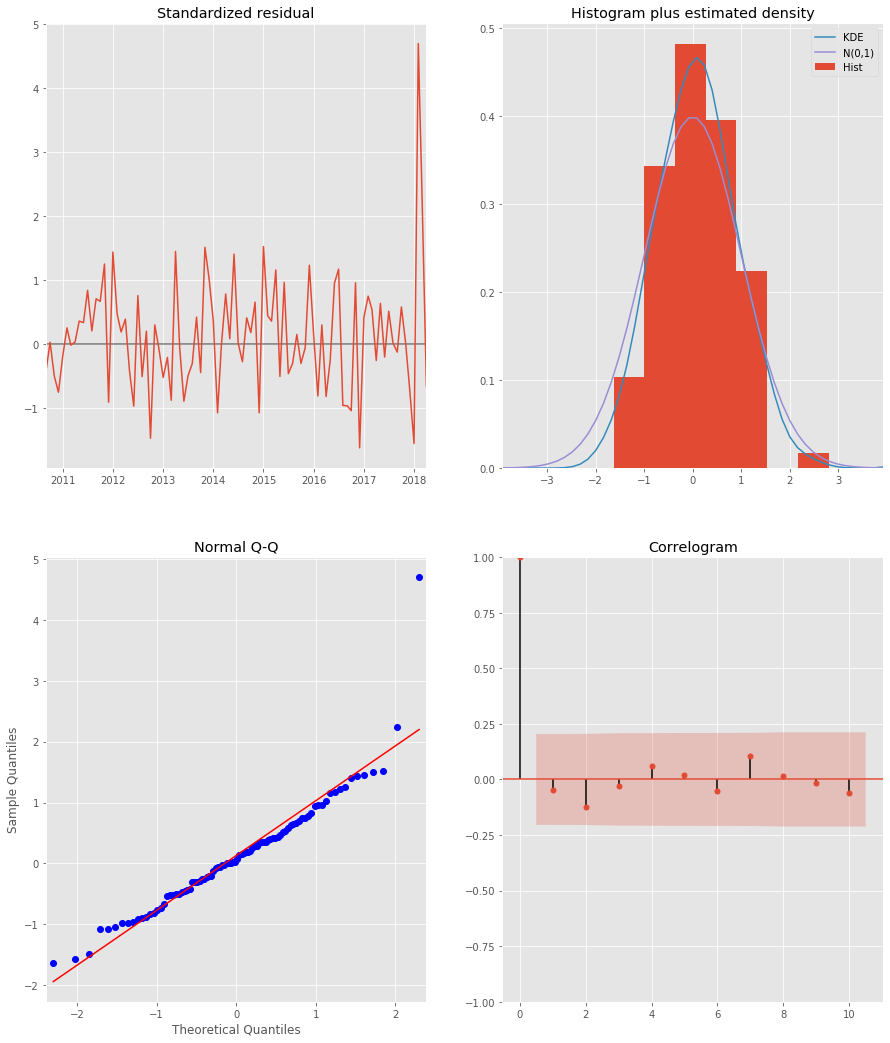

In [54]:
# Call plot_diagnostics() on the results calculated above 
output.plot_diagnostics(figsize=(15, 18))
plt.show()

## One-step Ahead Forecasting

In [32]:
# Get predictions starting from 01-01-1998 and calculate confidence intervals
pred = output.get_prediction(start=pd.to_datetime('2016-01-01'), dynamic=False)
pred_conf = pred.conf_int()

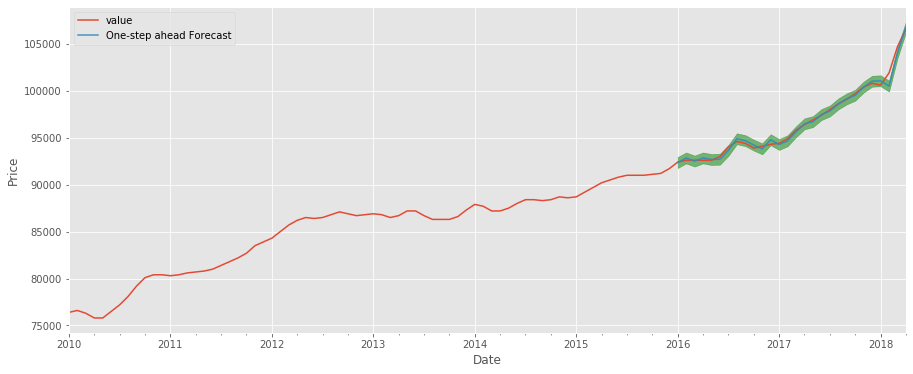

In [33]:
# Plot real vs predicted values along with confidence interval

rcParams['figure.figsize'] = 15, 6

# Plot observed values
ax = ts1['2010-01-01':].plot(label='observed')

# Plot predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=0.9)

# Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=0.5)

# Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.legend()

plt.show()

In [23]:
# pred.predicted_mean

In [26]:
# Get the real and predicted values
ts1_forecasted = pred.predicted_mean
ts1_truth = ts1['2015-01-01':]
mse = mean_squared_error(ts1_truth, ts1_forecasted)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))




The Root Mean Squared Error of our forecasts is 334.12


## Dynamic Forecasting

In [30]:
# Get dynamic predictions with confidence intervals as above 
pred_dynamic = output.get_prediction(start=pd.to_datetime('2016-01-01'), dynamic=True, full_results=True)
pred_dynamic_conf = pred_dynamic.conf_int()

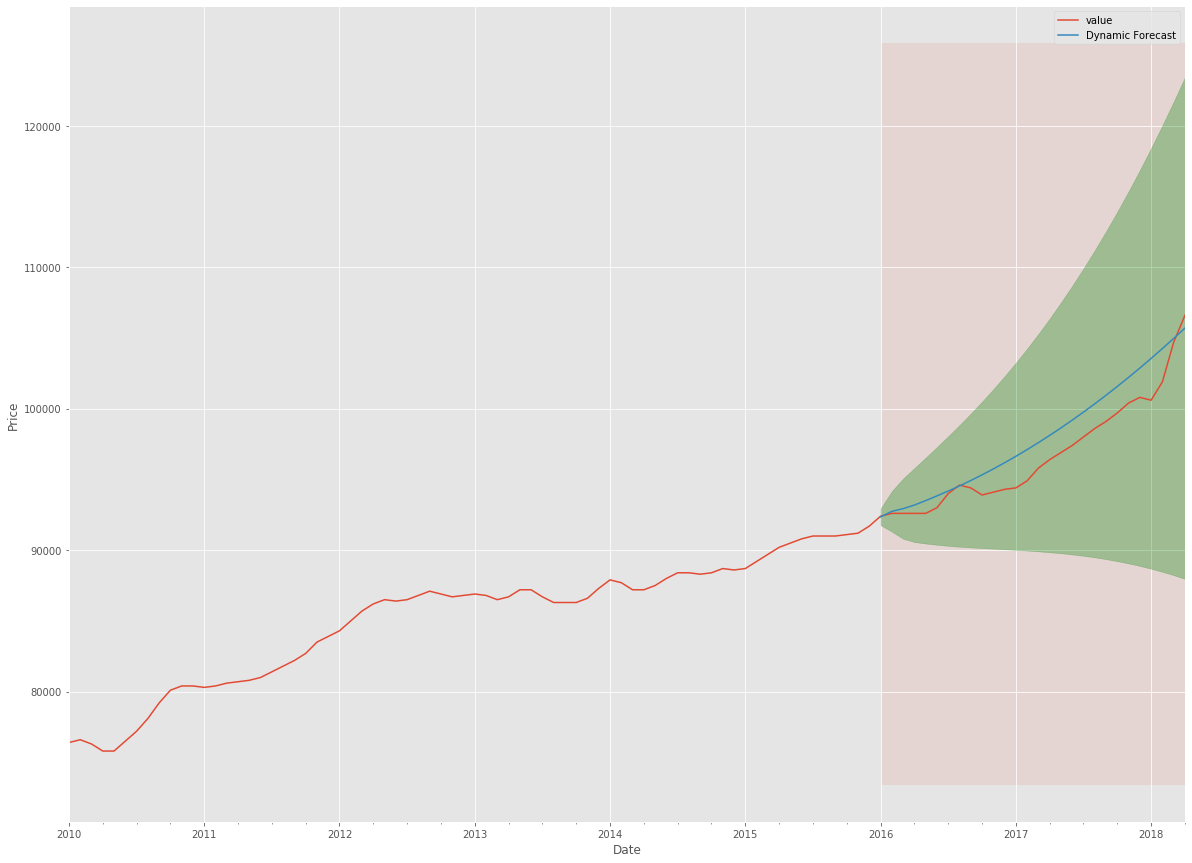

In [31]:
# Plot the dynamic forecast with confidence intervals.

ax = ts1['2010':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_conf.index,
                pred_dynamic_conf.iloc[:, 0],
                pred_dynamic_conf.iloc[:, 1], color='g', alpha=.3)


ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2016-01-01'), ts1_forecasted.index[-1], alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Price')

plt.legend()
plt.show()

In [71]:
# Get the real and predicted values
ts1_forecasted = pred_dynamic.predicted_mean
ts1_truth = ts1['2016-01-01':]
mse = mean_squared_error(ts1_truth, ts1_forecasted)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 1566.09


In [45]:
print(mse)

41249183.489025325


## Producing and visualising forecasts

In [35]:
# Get forecast 500 steps ahead in future
prediction = output.get_forecast(steps=24)

# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()

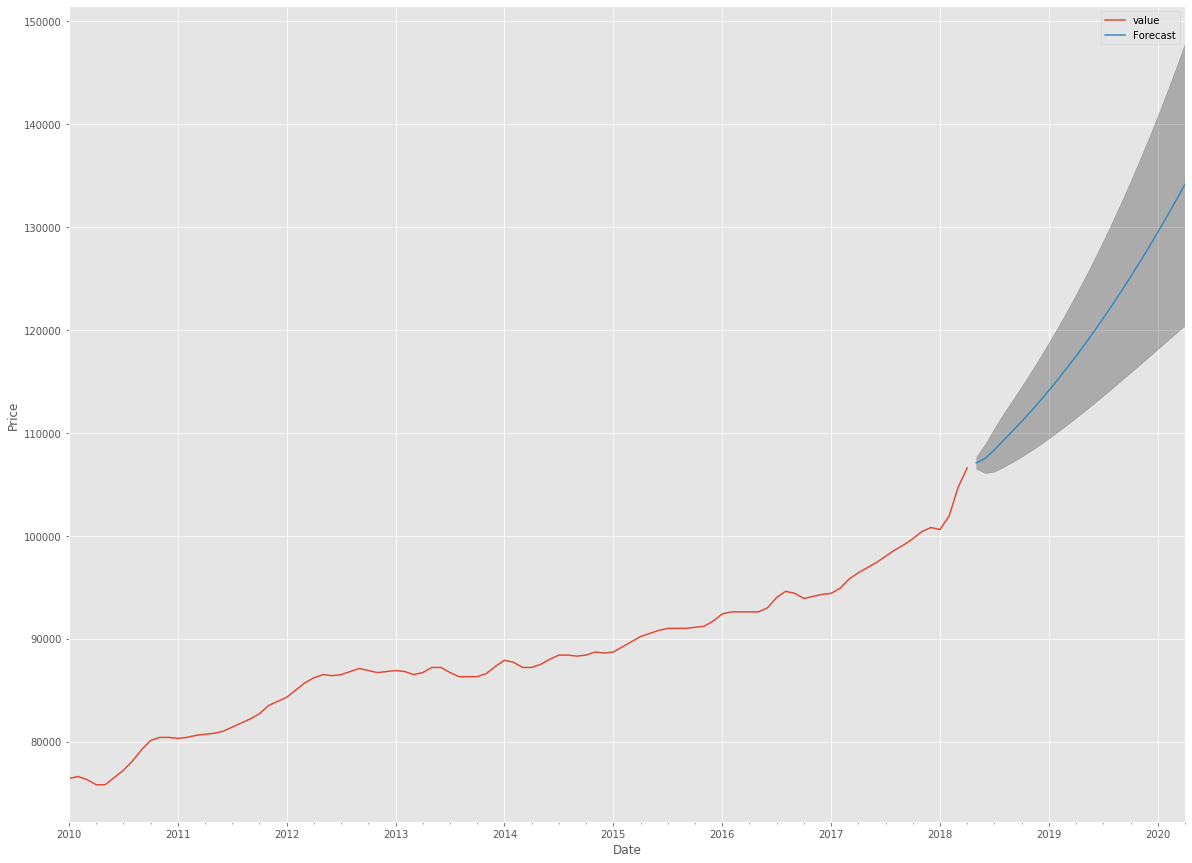

In [36]:
# Plot future predictions with confidence intervals
ax = ts1.plot(label='observed', figsize=(20, 15))
prediction.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='k', alpha=0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Price')

plt.legend()
plt.show()

In [37]:
# predicted value on Jan 1st 2020?
prediction.predicted_mean['2020-01-01']

129486.75809662208

In [38]:
# ROI
print((prediction.predicted_mean['2020-01-01']/ts1['2018-01'])-1)

               value
time                
2018-01-01  0.287145
